In [2]:
from random import random
import numpy as np
import pandas as pd
%matplotlib inline
%pylab inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=2.0)

from scipy import stats
from math import sqrt

import matplotlib.colors as colors
import matplotlib.cm as cmx

Populating the interactive namespace from numpy and matplotlib


/home/hh/jupyterhub/python2-upstream/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Basics

Пример того, как выглядит биномиальное распределение. Какие возможные наблюдаемую вероятность мы можем получить при разном размере выборки

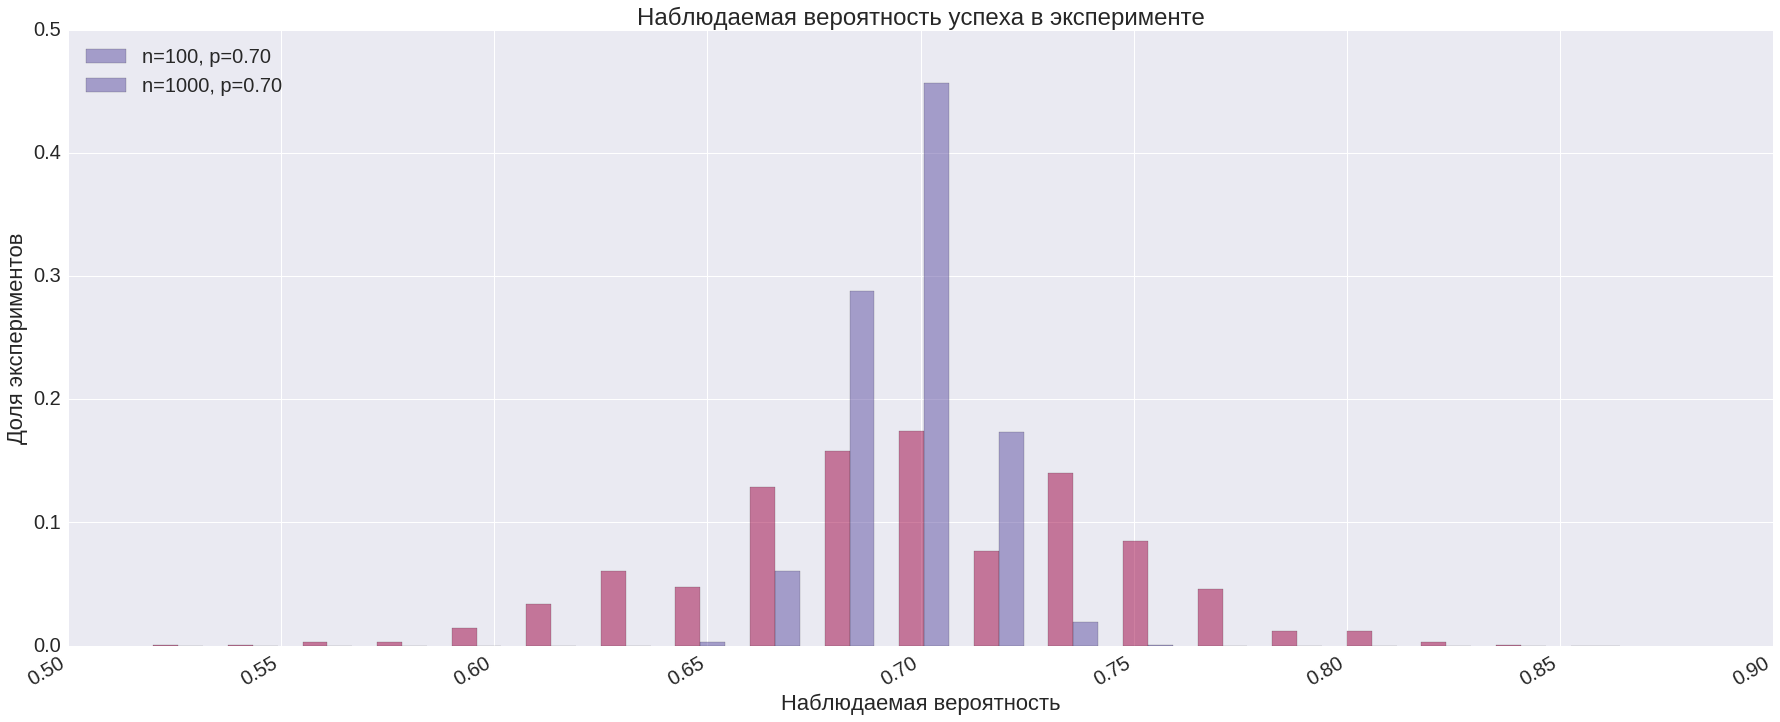

In [178]:
n_obs = [100, 1000]
p_ = [0.7, 0.7]
n_attempts = [10000, 10000]
experiments = []
labels = []
for n, p, n_a in zip(n_obs, p_, n_attempts):
    experiments.append(run_binary_experiment(n, p, n_a))
    labels.append('''n={0}, p={1:.2f}'''.format(n,p))
plt.close('all')
fig = plt.figure(figsize = (25,10))
plot_binary_experiment(fig.add_subplot(111), experiments, labels=labels)
plt.title(u'Наблюдаемая вероятность успеха в эксперименте')
plt.ylabel(u'Доля экспериментов')
plt.xlabel(u'Наблюдаемая вероятность')
plt.show()

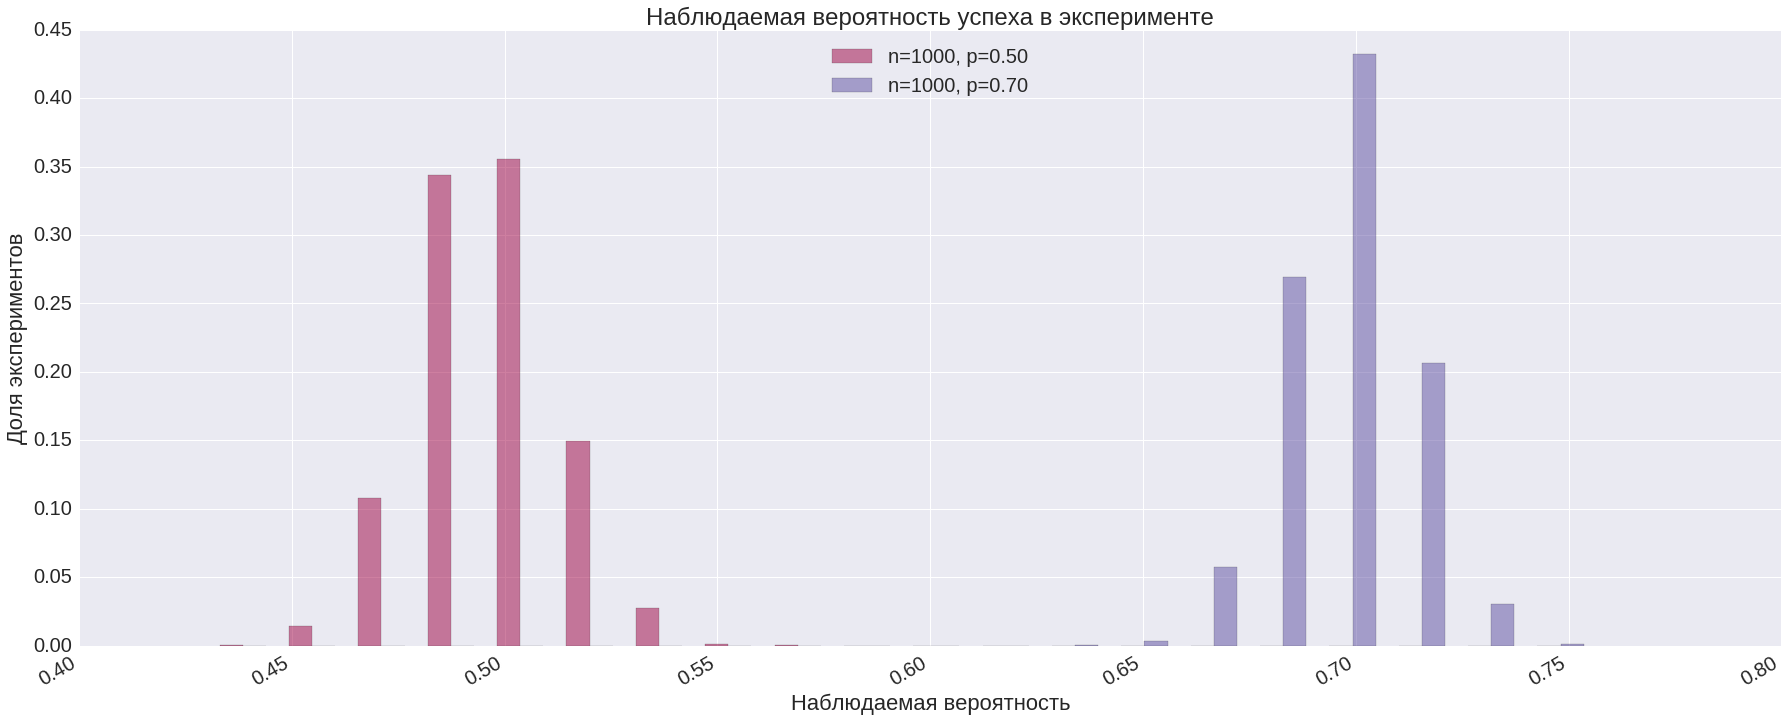

In [185]:
n_obs = [1000, 1000]
p_ = [0.5, 0.7]
n_attempts = [20000, 20000]
experiments = []
labels = []
for n, p, n_a in zip(n_obs, p_, n_attempts):
    experiments.append(run_binary_experiment(n, p, n_a))
    labels.append('''n={0}, p={1:.2f}'''.format(n,p))
plt.close('all')
fig = plt.figure(figsize = (25,10))
plot_binary_experiment(fig.add_subplot(111), experiments, labels=labels, bins=100, loc='upper center')
plt.title(u'Наблюдаемая вероятность успеха в эксперименте')
plt.ylabel(u'Доля экспериментов')
plt.xlabel(u'Наблюдаемая вероятность')
plt.show()

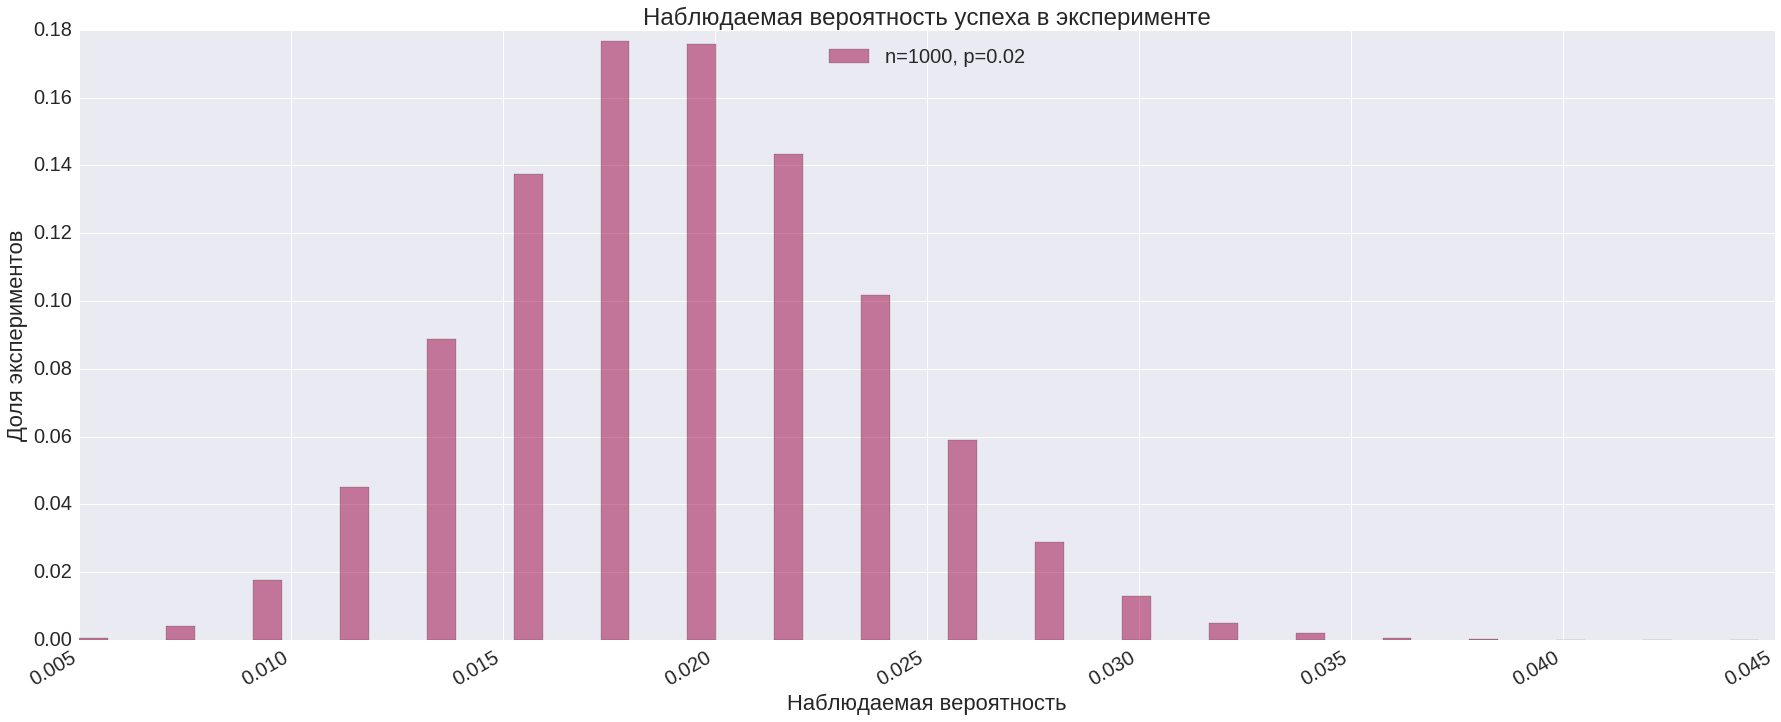

In [186]:
n_obs = [1000]
p_ = [0.02]
n_attempts = [20000]
experiments = []
labels = []
for n, p, n_a in zip(n_obs, p_, n_attempts):
    experiments.append(run_binary_experiment(n, p, n_a))
    labels.append('''n={0}, p={1:.2f}'''.format(n,p))
plt.close('all')
fig = plt.figure(figsize = (25,10))
plot_binary_experiment(fig.add_subplot(111), experiments, labels=labels, bins=100, loc='upper center')
plt.title(u'Наблюдаемая вероятность успеха в эксперименте')
plt.ylabel(u'Доля экспериментов')
plt.xlabel(u'Наблюдаемая вероятность')
plt.show()

# Type I error

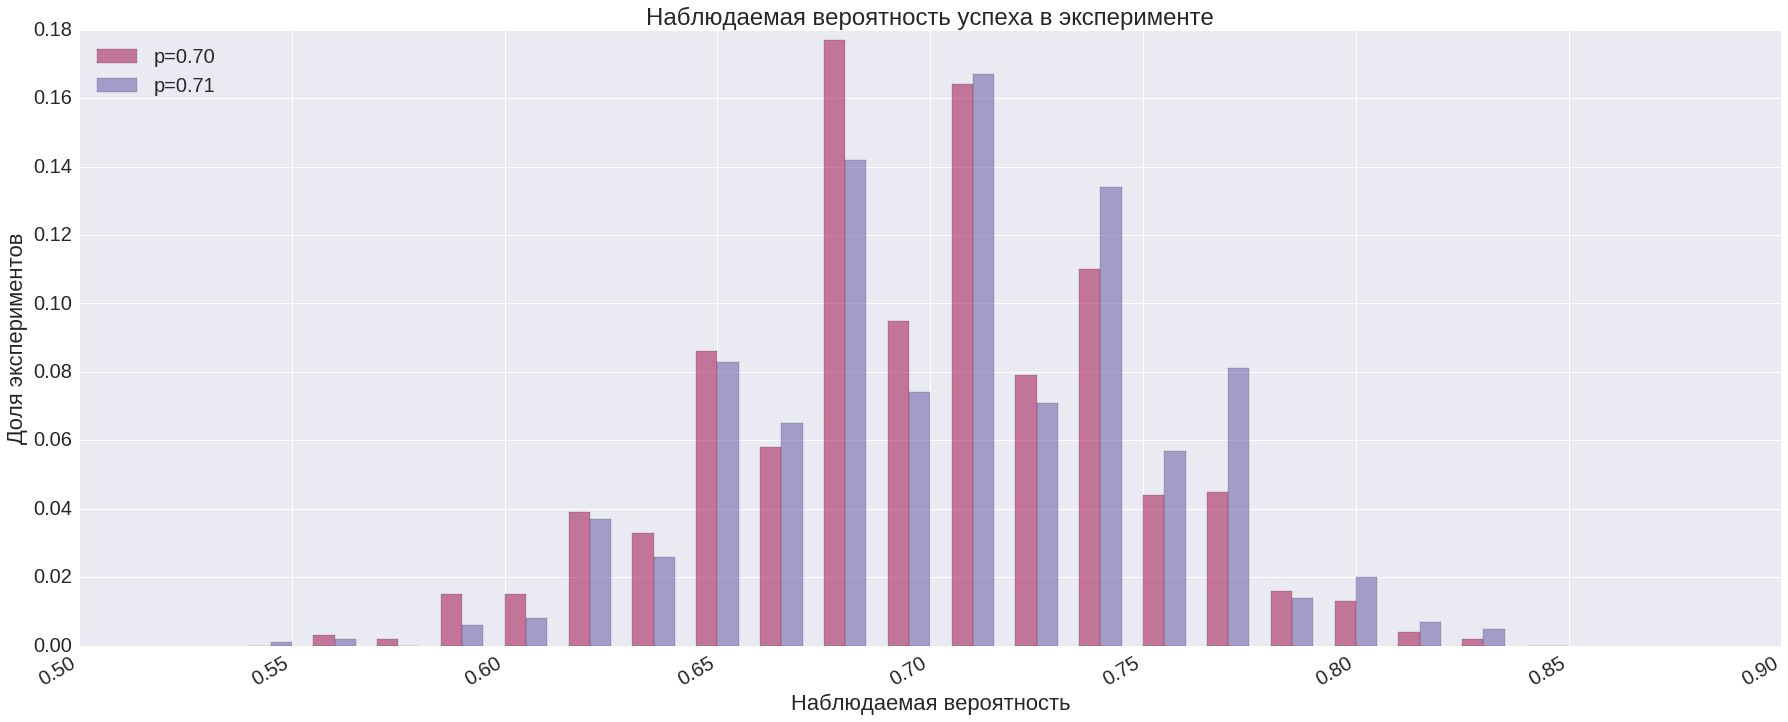

In [197]:
n_obs = [100, 1000, 10000, 100000]
n_attempts = 1000
p1 = 0.7
p2 = 0.71
plt.close('all')
for n in n_obs:
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(111)
    labels = ['''p={0:.2f}'''.format(p_1), '''p={0:.2f}'''.format(p_2)]
    res_1 = run_binary_experiment(n, p1, n_attempts)
    res_2 = run_binary_experiment(n, p2, n_attempts)

plot_binary_experiment(ax, [res_1, res_2], labels = labels, bins=100, loc='upper left')
plt.title(u'Наблюдаемая вероятность успеха в эксперименте')
plt.ylabel(u'Доля экспериментов')
plt.xlabel(u'Наблюдаемая вероятность')
plt.show()

In [34]:
n_obs = [100, 1000, 10000, 100000]
n_attempts = 10000
n_observations = 10000
p1 = 0.7
p2 = 0.71
print test_alpha(p1, p2, n_attempts, n_observations, 'ztest_eq_bin', 0.05)

0.3407


In [35]:
print 0.7+0.7/100
print 0.02+0.02/100

0.707
0.0202


In [39]:
n_obs = [10000]
p_ = [0.7, 0.7, 0.02]
n_attempts = 10000
for n_ in n_obs:
    for exp_p_ in p_:
        alpha_observed = test_alpha(exp_p_, exp_p_, n_attempts, n_, 'ztest_eq_bin', 0.05)
        print '''For p1 = {0:.4f}, {1} observations and {2} attempts observed alpha = {3:.3f}'''.format(
            exp_p_, n_, n_attempts, alpha_observed)

For p1 = 0.7000, 10000 observations and 10000 attempts observed alpha = 0.06
For p1 = 0.7000, 10000 observations and 10000 attempts observed alpha = 0.05
For p1 = 0.0200, 10000 observations and 10000 attempts observed alpha = 0.05


# Type II error

In [43]:
n_obs = [10000]
p_ = [[0.7, 0.72], [0.5, 0.52], [0.5, 0.6]]
n_attempts = 10000
for n_ in n_obs:
    for exp_p1_, exp_p2_ in p_:
        beta_observed = test_alpha(exp_p1_, exp_p2_, n_attempts, n_, 'ztest_eq_bin', 0.05)
        print '''For p1 = {0:.4f}, {1} observations and {2} attempts observed beta = {3:.3f}'''.format(
            exp_p_, n_, n_attempts, beta_observed)

For p1 = 0.7000, 10000 observations and 10000 attempts observed beta = 0.875
For p1 = 0.7000, 10000 observations and 10000 attempts observed beta = 0.808
For p1 = 0.7000, 10000 observations and 10000 attempts observed beta = 1.000


# Utils

In [ ]:
def ztest_eq_bin_oneside(p1, n1, p2, n2, effect_size=0):
    # Z-test for two population means (variances equal, binomial distribution)
    var1 = p1 * (1 - p1)
    var2 = p2 * (1 - p2)
    zstat = (p1 - p2 - effect_size) / sqrt(var1 / n1 + var2 / n2)
    pvalue = stats.norm.sf(zstat)
    return zstat, pvalue

In [3]:
def ztest_eq_bin(p1, n1, p2, n2, alternative='two-sided'):
    # Z-test for two population means (variances equal, binomial distribution)
    p = (p1 * n1 + p2 * n2) / (n1 + n2)
    try:
        zstat = (p1 - p2) / sqrt(p * (1 - p) * (1. / n1 + 1. / n2))
    except:
        print p1, p2, n1, n2
        raise ValueError('zstat can not be calculated')
    if alternative == 'two-sided':
        pvalue = stats.norm.sf(np.abs(zstat)) * 2
    elif alternative in ['larger', 'l']:
        pvalue = stats.norm.sf(zstat)
    elif alternative in ['smaller', 's']:
        pvalue = stats.norm.cdf(zstat)
    else:
        raise ValueError('invalid alternative')
    return zstat, pvalue

In [150]:
def generate_random_colors(N):
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='Spectral')  #jet, gnuplot, Spectral
    return [scalar_map.to_rgba(i) for i in range(N)]

In [84]:
def convert_colors_to_rgba(colors_list):
    cc = colors.ColorConverter()
    return [cc.to_rgba(i) for i in colors_list]

In [19]:
def run_binary_experiment(n_obs, p, n_attempts = 1000):
    return [np.mean([1. if random.random() < p else 0. for i in range(n_obs)]) for i1 in range(n_attempts)]

In [181]:
def plot_binary_experiment(ax, data, **kwargs):
    bins_amount = kwargs.get('bins_amount', 20)
    colors = kwargs.get('colors')
    n_lines = len(data)
    labels = kwargs.get('labels', range(n_lines))
    loc=kwargs.get('loc', 'upper left')
    
    if not colors or len(colors) <> n_lines:
        colors = generate_random_colors(n_lines)
   
    step_min = np.min([np.min(el) for el in data])
    step_max = np.max([np.max(el) for el in data])
    
    step = (step_max - step_min) / bins_amount
    bins = np.arange(step_min, step_max+step, step)
    
    width = step/3
    plots = []
    for i in range(n_lines):
        hist_data, _ = np.histogram(data[i], bins)
        hist_data = 1.0 * hist_data / hist_data.sum()
        p = ax.bar(bins[:-1]+width*i, hist_data, label = labels[i], alpha=0.5, width = width, color=colors[i])
        plots.append(p)
    ax.legend(plots, [l.get_label() for l in plots], loc=loc)
    ax.autofmt_xdate()  # rotates x-axis labels to be more readable
    plt.tight_layout()  # tidy up and remove some margins

In [32]:
def test_alpha(p1, p2, n_attempts, n_observations, test, alpha):
    total_attempts = 0
    total_diff = 0
    exp1 = run_binary_experiment(n_observations, p1, n_attempts)
    exp2 = run_binary_experiment(n_observations, p2, n_attempts)
    for p1_observed, p2_observed in zip(exp1, exp2):
        pv_ = None
        if test == 'ztest_eq_bin':
            _, pv_ = ztest_eq_bin(p1_observed, n_observations, p2_observed, n_observations)
        total_diff += 1 if (pv_ < alpha) else 0
    return 1.0*total_diff/n_attempts
